# Preprocessing techniques

1.Encoded categorical variables 

Description: In this section, the variables (product types, skin types, and notable effects) will be converted and represented as numerical data. This process will be done using one-hot encoding. One-hot encoding transforms categorical variables into binary vectors, where each category is represented by a column, and the value for that category is set to 1, while all other categories are set to 0.

Justification: Categorical variables, must be encoded into numerical values to make them compatible with machine learning models. By transforming these variables, we enable the model to understand the data accurately, without biases that might arise from treating them as non-numeric values. We chose to implement One-hot encoding instead of label encoding because label encoding imposes an arbitrary order on categorical data, which can be misleading as it causes the model to falsely interpret these categories as having a meaningful order.


In [1]:
# 1.Encoded categorical variables 

import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Load the CSV file into a DataFrame
file_path = 'export_skincare.csv'  # Replace with the path to your file
df = pd.read_csv(file_path)


# Convert relevant columns from strings into lists (splitting by comma)
columns_to_convert = ['skintype', 'product_type', 'notable_effects']

# Convert comma-separated values to lists
for col in columns_to_convert:
    df[col] = df[col].apply(lambda x: [item.strip() for item in x.split(',')] if pd.notna(x) else [])

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Apply one-hot encoding for each categorical list column
for col in columns_to_convert:
    encoded = pd.DataFrame(mlb.fit_transform(df[col]), columns=[f"{col}_{label}" for label in mlb.classes_])
    df = pd.concat([df, encoded], axis=1)  # Merge with the original DataFrame

In [3]:
# 2.Price Formatting and Currency Conversion

IDR_to_SAR = 0.00023  # Adjust as needed

def convert_to_sar(price):
    if isinstance(price, str) and 'Rp' in price:
        try:
            # Remove 'Rp' and commas, then convert to an integer
            price_idr = int(price.replace('Rp', '').replace('.', '').strip())
            return round(price_idr * IDR_to_SAR, 2)  
        except ValueError:
            return None  
    return price  

df['price'] = df['price'].apply(convert_to_sar)

In [4]:
# 3.Language Translation 

from deep_translator import GoogleTranslator

# Initialize the Translator
translator = GoogleTranslator(source='auto', target='en')

# Function to translate text
def translate_text(text):
    try:
        return translator.translate(text) if pd.notna(text) else text
    except Exception as e:
        return f"Error: {e}"  # Handle translation errors

# Apply translation to the entire 'description' column
if 'description' in df.columns:
    df['description'] = df['description'].apply(translate_text)

# Print confirmation
print("Translation completed for the entire dataset.")

Translation completed for the entire dataset.



Removed 443 broken product URLs:
https://www.beautyhaul.com/product/detail/bubble-free-ph-balancing-cleanser
https://www.beautyhaul.com/product/detail/aquaseal-soothing-tonic
https://www.beautyhaul.com/product/detail/sunorion-uv-sunscreen
https://www.beautyhaul.com/product/detail/incredipeel-exfoliating-purifying-facial-toner
https://www.beautyhaul.com/product/detail/whitifique-face-cream
https://www.beautyhaul.com/product/detail/smooth-pure-cleansing-foam 
https://www.beautyhaul.com/product/detail/miraculous-refining-serum-anniversary-edition
https://www.beautyhaul.com/product/detail/silkyluz-the-bohemian-soap-90g
https://www.beautyhaul.com/product/detail/your-skin-bae-series-toner-salicylic-acid-1-zinc-tea-tree-water
https://www.beautyhaul.com/product/detail/miraculous-retinol-toner-20-ml
https://www.beautyhaul.com/product/detail/your-skin-bae-series-toner-ceramide-lc-s-20-1-mugwort-cica
https://www.beautyhaul.com/product/detail/your-skin-bae-series-toner-niacinamide-7-alpha-arbutin
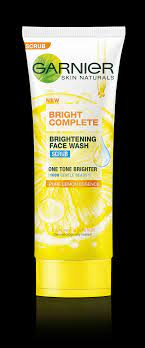

In [5]:
# 4.Product URL validity and 5.Image URL validity 

import requests

# Function to check if a URL is working
def check_url_status(url):
    try:
        response = requests.head(url, timeout=5)  # Faster check with HEAD request
        if response.status_code == 200:
            return "Working"
        else:
            return f"Broken ({response.status_code})"
    except requests.RequestException:
        return "Broken (No Response)"


# Lists to store broken URLs before deletion
broken_product_href_list = []
broken_picture_src_list = []

# Check and remove broken 'product_href' URLs
if 'product_href' in df.columns:
    df['product_href_status'] = df['product_href'].apply(check_url_status)
    broken_product_href_list = df[df['product_href_status'].str.startswith("Broken", na=False)]['product_href'].tolist()
    df = df[df['product_href_status'] == "Working"].drop(columns=['product_href_status'])

# Check and remove broken 'picture_src' URLs
if 'picture_src' in df.columns:
    df['picture_src_status'] = df['picture_src'].apply(check_url_status)
    broken_picture_src_list = df[df['picture_src_status'].str.startswith("Broken", na=False)]['picture_src'].tolist()
    df = df[df['picture_src_status'] == "Working"].drop(columns=['picture_src_status'])

# Print broken URLs that were removed
print(f"\nRemoved {len(broken_product_href_list)} broken product URLs:")
for url in broken_product_href_list:
    print(url)

print(f"\nRemoved {len(broken_picture_src_list)} broken picture URLs:")
for url in broken_picture_src_list:
    print(url)

print("\nDataset cleaned: Broken URLs removed.")

In [6]:
# Save the processed DataFrame
processed_file_path = 'processed_file.csv'  # Path to save the processed file
df.to_csv(processed_file_path, index=False)

print(f'Processed file saved to {processed_file_path}')

Processed file saved to processed_file.csv
